# Übung 1

## Bäume zeichnen
Zunächst konstruieren wir manuell einen Baum:

In [1]:
from nltk.tree import Tree

np1 = Tree('NP', [Tree('ART', ['der']), Tree('N', ['Hund'])])
np2 = Tree('NP', [Tree('ART', ['die']), Tree('N', ['Katze'])])
vp = Tree('VP', [Tree('V', ['jagt']), np2])

Um ihn anzuzeigen, genügt es, die Variable alleine in die letzte Zeile einer Zelle zu schreiben.

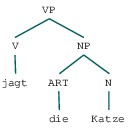

In [2]:
vp

Möchte man mehr als nur einen Baum in derselben Zelle anzeigen, bietet `display` mehr Flexibilität.

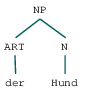

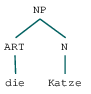

In [3]:
from IPython.display import display

display(np1)
display(np2)

Für eine Darstellung in der Konsole gibt es zwei Möglichkeiten:

In [4]:
print(vp)

(VP (V jagt) (NP (ART die) (N Katze)))


In [5]:
vp.pretty_print(unicodelines=True)

      VP          
 ┌────┴───┐        
 │        NP      
 │    ┌───┴────┐   
 V   ART       N  
 │    │        │   
jagt die     Katze



## Stanford Parser
Wenn Sie den Stanford Parser erfolgreich installiert haben, können Sie auch folgende Zellen ausprobieren.

In [6]:
from nltk.parse.stanford import StanfordParser, StanfordDependencyParser
import os

### Deutsche Konstituentenbäume
Zunächst müssen die Pfade korrekt gesetzt werden.

`PATH_TO_CORE` : Pfad zum CoreNLP

`PATH_TO_GER_MODEL` : Pfad zum deutschen Modell

Verwenden Sie am besten voll ausgeschriebene absolute Pfade.

In [7]:
PATH_TO_CORE = "/home/robin/Downloads/stanford-corenlp/stanford-corenlp-full-2017-06-09"
PATH_TO_GER_MODEL = "/home/robin/Downloads"

In [15]:
jar = os.path.join(
    PATH_TO_CORE,
    "stanford-corenlp-3.8.0.jar"
)
ger_model = os.path.join(
    PATH_TO_GER_MODEL,
    "stanford-german-corenlp-2017-06-09-models.jar"
)

Anschließend kann der `StanfordParser` damit geladen werden.

In [16]:
parser = StanfordParser(
    jar, ger_model,
    model_path="edu/stanford/nlp/models/lexparser/" + 
        "germanPCFG.ser.gz"
)

Für eine syntaktische Analyse verwenden Sie einfach `raw_parse`.

In [17]:
tree_list = list(parser.raw_parse('Dies ist mein erster Satz.'))
tree_list[0].pretty_print(unicodelines=True)

            ROOT                 
             │                    
             S                   
 ┌─────┬─────┴──────┬──────────┐  
 │     │            NP         │ 
 │     │     ┌──────┼─────┐    │  
PDS  VAFIN PPOSAT  ADJA   NN   $.
 │     │     │      │     │    │  
Dies  ist   mein  erster Satz  . 



### Englische Dependenzbäume
Dieses zweite Beispiel zeigt die Funktionsweise des Dependenzparsers und die des englischen Modells.

Analog müssen die Pfade zu CoreNLP und Modell definiert werden:

In [19]:
jar = os.path.join(
    PATH_TO_CORE,
    "stanford-corenlp-3.8.0.jar"
)
model = os.path.join(
    PATH_TO_CORE,
    "stanford-corenlp-3.8.0-models.jar"
)

Damit wird dann der Parser (ein `StanfordDependencyParser` in diesem Fall) initialisiert.

In [20]:
dep_parser = StanfordDependencyParser(
    jar, model,
    model_path="edu/stanford/nlp/models/lexparser/" + 
    "englishPCFG.ser.gz"
)

Das Parsing geschieht wieder mittels `raw_parse`.

In [21]:
result = dep_parser.raw_parse('I saw an elephant')
for parse in result:
    print(parse.to_dot())

digraph G{
edge [dir=forward]
node [shape=plaintext]

0 [label="0 (None)"]
0 -> 2 [label="root"]
1 [label="1 (I)"]
2 [label="2 (saw)"]
2 -> 1 [label="nsubj"]
2 -> 4 [label="dobj"]
3 [label="3 (an)"]
4 [label="4 (elephant)"]
4 -> 3 [label="det"]
}


Probieren Sie auch die Default-Darstellung dieser Dependency-Graphen in Jupyter aus.
(Sie müssen dafür evtl. [graphviz](http://www.graphviz.org/) installieren.)

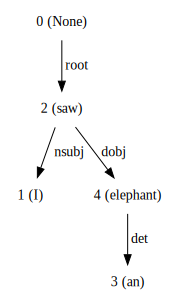

In [22]:
parse